In [1]:
#读取数据
import numpy as np
NEW_FILE3 = 'D:/datasets/solar/new_data/new_data4.csv'
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1,usecols=(0,1,3,4,5,6,7))#时间、月份、温度、湿度、辐射、漫反射、功率
Ever_day = []
for i in range(813):
    tmp = data[i*21:i*21+21,:]
    Ever_day.append(np.mean(tmp, 0))#按列求平均
Ever_day = np.array(Ever_day)
X = Ever_day[:,1:]
from sklearn.cluster import DBSCAN,KMeans
#db = KMeans(n_clusters=3).fit(X_scaler)
#db = DBSCAN(eps = 0.4, min_samples = 10).fit(X_scaler)
db = DBSCAN(eps = 28, min_samples = 5).fit(X)
labels = db.labels_
Ever_day = np.c_[Ever_day,labels]#在Every_day后增加一列
class_one = []
class_two = []
class_three = []
for row in Ever_day:
    if row[-1] == -1:
        class_one.append(row[0])
    elif row[-1] == 0:
        class_two.append(row[0])
    else:
        class_three.append(row[0])
class_1 = class_two
sub_class = class_one + class_three
print(len(class_1),len(sub_class))

581 232


In [2]:
#data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1,usecols=(0,1,2,3,4,5,6,7,8))
#日期、月份、时刻、温度、湿度、辐射、降雨、漫反射、功率
date,month,timepoint,temperature,humidity,radiation,diffuse,power = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1,unpack=True)
from sklearn import preprocessing
sub_date = []
sub_temperature =[]
sub_humidity = []
sub_radiation = []
sub_diffuse = []
sub_power = []
for i in range(len(date)):
    if date[i] in sub_class:
        sub_date.append(date[i])
        sub_temperature.append(temperature[i])
        sub_humidity.append(humidity[i])
        sub_radiation.append(radiation[i])
        sub_diffuse.append(diffuse[i])
        sub_power.append(power[i])

sub_date_d = []
sub_temperature_d =[]
sub_humidity_d = []
sub_radiation_d = []
sub_diffuse_d = []
sub_power_d = []
#按日的 温度 湿度  辐射 漫反射 功率
for i in range(len(sub_class)):
    sub_date_d.append(np.mean(sub_date[i*21:i*21+21]))
    sub_temperature_d.append(
        [np.max(sub_temperature[i*21:i*21+21]),np.mean(sub_temperature[i*21:i*21+21]),np.min(sub_temperature[i*21:i*21+21])])
    sub_humidity_d.append(
        [np.max(sub_humidity[i*21:i*21+21]),np.mean(sub_humidity[i*21:i*21+21]),np.min(sub_humidity[i*21:i*21+21])])
    sub_radiation_d.append(np.mean(sub_radiation[i*21:i*21+21]))
    sub_diffuse_d.append(np.mean(sub_diffuse[i*21:i*21+21]))
    sub_power_d.append(np.mean(sub_power[i*21:i*21+21]))
sub_date_d = np.reshape(sub_date_d,[-1,1])
sub_radiation_d = np.reshape(sub_radiation_d,[-1,1])
sub_diffuse_d = np.reshape(sub_diffuse_d,[-1,1])
sub_power_d = np.reshape(sub_power_d,[-1,1])
#归一化每日 温度 湿度 雨 辐射 漫反射
day_temperature_scaler = preprocessing.MinMaxScaler().fit_transform(sub_temperature_d)
day_humidity_scaler = preprocessing.MinMaxScaler().fit_transform(sub_humidity_d)
day_radiation_scaler = preprocessing.MinMaxScaler().fit_transform(sub_radiation_d)
day_diffuse_scaler = preprocessing.MinMaxScaler().fit_transform(sub_diffuse_d)
day_power_scaler = preprocessing.MinMaxScaler().fit_transform(sub_power_d)

sub_data = np.c_[sub_date_d,day_temperature_scaler,
                 day_humidity_scaler,day_radiation_scaler,day_diffuse_scaler,day_power_scaler]
print(sub_data.shape)

(232, 10)


In [338]:
X = sub_data[:,1:]
db = DBSCAN(eps=0.32, min_samples=9).fit(X)
labels = db.labels_
p = set(labels)
sub_data_labels = np.c_[sub_data,labels]
class_2 = []
class_3 = []
for row in sub_data_labels:
    if row[-1] == -1:
        class_2.append(row[0])
    else:
        class_3.append(row[0])
print(len(class_2),len(class_3))

{0, 1, 2, -1}
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
148 84


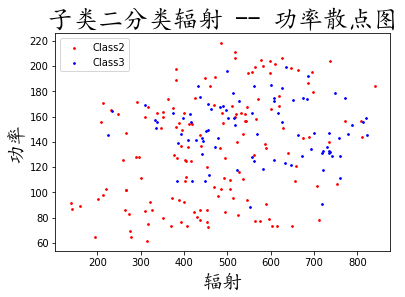

In [339]:
import matplotlib.pyplot as plt
class_2_curve = []
class_3_curve = []
for i in range(len(sub_class)):
    if sub_date_d[i][0] in class_2:
        class_2_curve.append([sub_radiation_d[i][0],sub_power_d[i][0]])
    else:
        class_3_curve.append([sub_radiation_d[i][0],sub_power_d[i][0]])
class_2_curve = np.array(class_2_curve)
class_3_curve = np.array(class_3_curve)
plt.scatter(class_2_curve[:,0],class_2_curve[:,1],s = 3,c = 'r',label = 'Class2')
plt.scatter(class_3_curve[:,0],class_3_curve[:,1],s = 3,c = 'b',label = 'Class3')
plt.xlabel('辐射',fontproperties = 'Kaiti',fontsize = 20)
plt.ylabel('功率',fontproperties = 'Kaiti',fontsize = 20)
plt.title('子类二分类辐射 -- 功率散点图',fontproperties = 'Kaiti',fontsize = 25)
plt.legend()
plt.show()

## SVM

In [412]:
data = np.loadtxt(NEW_FILE3,delimiter=',',skiprows=1)
for i in range(len(data)):
#     if data[i][1] == 1:data[i][1] = 1.705
#     elif data[i][1] == 2:data[i][1] = 1.823
#     elif data[i][1] == 3:data[i][1] = 1.706
#     elif data[i][1] == 4:data[i][1] = 1.561
#     elif data[i][1] == 5:data[i][1] = 1.382
#     elif data[i][1] == 6:data[i][1] = 1.297
#     elif data[i][1] == 7:data[i][1] = 1.465
#     elif data[i][1] == 8:data[i][1] = 1.642
#     elif data[i][1] == 9:data[i][1] = 1.697
#     elif data[i][1] == 10:data[i][1] = 1.776
#     elif data[i][1] == 11:data[i][1] = 1.73
#     elif data[i][1] == 12:data[i][1] = 1.641
    
    if data[i][2] == 8.0:data[i][2] = 4.997
    elif data[i][2] == 8.5:data[i][2] = 8.631
    elif data[i][2] == 9.0:data[i][2] = 12.103
    elif data[i][2] == 9.5:data[i][2] = 14.982
    elif data[i][2] == 10.0:data[i][2] = 17.569
    elif data[i][2] == 10.5:data[i][2] = 19.623
    elif data[i][2] == 11.0:data[i][2] = 21.311
    elif data[i][2] == 11.5:data[i][2] = 22.565
    elif data[i][2] == 12.0:data[i][2] = 23.349
    elif data[i][2] == 12.5:data[i][2] = 23.464
    elif data[i][2] == 13.0:data[i][2] = 23.431
    elif data[i][2] == 13.5:data[i][2] = 23.023
    elif data[i][2] == 14.0:data[i][2] = 21.917
    elif data[i][2] == 14.5:data[i][2] = 20.513
    elif data[i][2] == 15.0:data[i][2] = 19.129
    elif data[i][2] == 15.5:data[i][2] = 17.108
    elif data[i][2] == 16.0:data[i][2] = 14.687
    elif data[i][2] == 16.5:data[i][2] = 11.826
    elif data[i][2] == 17.0:data[i][2] = 8.88
    elif data[i][2] == 17.5:data[i][2] = 5.4075
    elif data[i][2] == 18.0:data[i][2] = 2.4706
    
    if data[i][-1] == 0:data[i][-1] = data[i][-3]*0.1

skip_day = [1,16,31,38,69,81,126,182,197,280,301,320,330,413,484,498,579,622,636,651,683,739,749,860]
#skip_day = skip_day + class_1 + class_2 + class_3 + class_4 + class_5 + class_6 + class_7
skip_day = skip_day + class_1 + class_2
all_data = []
for i in range(17073-21):
    if data[i][0] in skip_day:
        continue
    elif i%21 == 0:
        all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],
                                  data[i][6],data[i-21][7],data[i-21][7],data[i][7]]))
    else:
        all_data.append(np.array([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],
                                  data[i][6],data[i-21][7],data[i-1][7],data[i][7]]))
print('class 2 :',len(all_data)/21)
print('测试数',int(len(all_data)/105))

class 2 : 82.0
测试数 16


In [413]:
f = []
from sklearn import svm
for i in [1,2,3,4,5]:
    np.random.seed(i)
    test_list = np.random.randint(0,int(len(all_data)/21),size = int(len(all_data)/105))#有重复
    test_list = sorted(set(test_list))

    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_date = []
    test_date = []
    for i in range(int(len(all_data)/21)):
        for j in range(21):
            a = all_data[i*21+j]
            if i in test_list:
                test_data.append(a[1:-1])
                test_label.append(a[-1])
                test_date.append(a[0])
            else:
                train_data.append(a[1:-1])
                train_label.append(a[-1])
                train_date.append(a[0])
    
    svr = svm.SVR(kernel = 'rbf', C = 1000, gamma = 0.000011)
    svr.fit(train_data,train_label)
    predict_power = svr.predict(test_data)
    mape = [abs(predict_power[i]-test_label[i])/test_label[i] for i in range(len(test_label))]
    f.append(np.mean(mape))
print('class_2',np.mean(f))

class_2 0.3397524075510495
